In [ ]:
# baseline cnn model for cifar10
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

0: airplane

❼ 1: automobile

❼ 2: bird

❼ 3: cat

❼ 4: deer

❼ 5: dog

❼ 6: frog

❼ 7: horse

❼ 8: ship

❼ 9: truck


In [ ]:
# load dataset
from matplotlib import pyplot
from keras.datasets import cifar10
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print("Train: X=%s, y=%s" % (trainX.shape, trainy.shape))
print("Test: X=%s, y=%s" % (testX.shape, testy.shape))

170500096/170498071 [==============================] - 4s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
print(trainX.shape, trainy.shape)

(50000, 32, 32, 3) (50000, 1)


In [ ]:
x1=trainX[4]

In [ ]:
x1.shape

(32, 32, 3)

In [ ]:
from matplotlib import pyplot

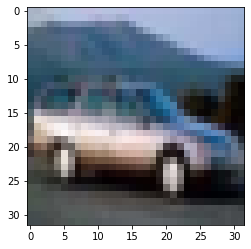

In [ ]:
pyplot.imshow(x1)

In [ ]:
trainY = to_categorical(trainy)
testY = to_categorical(testy)

In [ ]:
print("Train: X=%s, y=%s" % (trainX.shape, trainY.shape))
print("Test: X=%s, y=%s" % (testX.shape, testY.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 10)
Test: X=(10000, 32, 32, 3), y=(10000, 10)


In [ ]:
# convert from integers to floats
train_norm = trainX.astype("float32")
test_norm = testX.astype("float32")
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer="he_uniform",input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(MaxPooling2D((2, 2)))
# example output part of the model
model.add(Flatten())
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
model.add(Dense(10, activation="softmax"))

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               524416    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:

history=model.fit(train_norm, trainY, epochs=20, batch_size=64, validation_data=(test_norm, testY), verbose=1)

Epoch 1/20
782/782 [==============================] - 37s 6ms/step - loss: 2.0055 - accuracy: 0.2818 - val_loss: 1.5756 - val_accuracy: 0.4449
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 1.5298 - accuracy: 0.4634 - val_loss: 1.3793 - val_accuracy: 0.5196
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 1.3481 - accuracy: 0.5236 - val_loss: 1.2702 - val_accuracy: 0.5515
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 1.2466 - accuracy: 0.5614 - val_loss: 1.2133 - val_accuracy: 0.5728
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 1.1705 - accuracy: 0.5888 - val_loss: 1.1911 - val_accuracy: 0.5828
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 1.1125 - accuracy: 0.6126 - val_loss: 1.0904 - val_accuracy: 0.6181
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 1.0526 - accuracy: 0.6304 - val_loss: 1.0526 - val_accuracy: 0.6340
Epoch

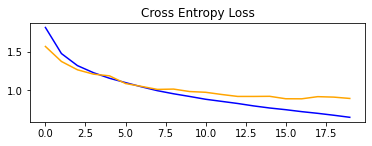

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.title("Cross Entropy Loss")
plt.plot(history.history["loss"], color="blue", label="train")
plt.plot(history.history["val_loss"], color="orange", label="test")

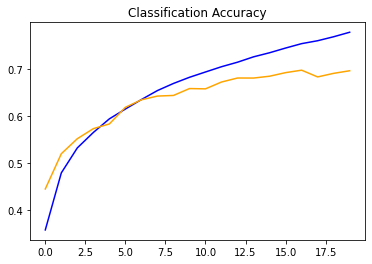

In [ ]:
plt.title("Classification Accuracy")
plt.plot(history.history["accuracy"], color="blue", label="train")
plt.plot(history.history["val_accuracy"], color="orange", label="test")

Let's Increase The complexity

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer="he_uniform",input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(MaxPooling2D((2, 2)))
# example output part of the model
model.add(Flatten())
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
model.add(Dense(10, activation="softmax"))

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])
history=model.fit(train_norm, trainY, epochs=20, batch_size=64, validation_data=(test_norm, testY), verbose=1)

Epoch 1/20
782/782 [==============================] - 8s 9ms/step - loss: 1.9566 - accuracy: 0.2887 - val_loss: 1.4558 - val_accuracy: 0.4759
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 1.4255 - accuracy: 0.4866 - val_loss: 1.2638 - val_accuracy: 0.5503
Epoch 3/20
782/782 [==============================] - 6s 8ms/step - loss: 1.2329 - accuracy: 0.5635 - val_loss: 1.2191 - val_accuracy: 0.5734
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 1.0867 - accuracy: 0.6138 - val_loss: 1.0705 - val_accuracy: 0.6169
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.9700 - accuracy: 0.6587 - val_loss: 0.9876 - val_accuracy: 0.6535
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.8816 - accuracy: 0.6921 - val_loss: 0.9561 - val_accuracy: 0.6690
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.8217 - accuracy: 0.7120 - val_loss: 0.9601 - val_accuracy: 0.6707
Epoch 

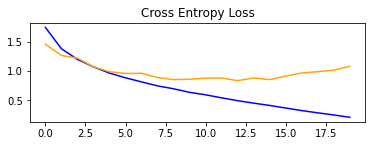

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.title("Cross Entropy Loss")
plt.plot(history.history["loss"], color="blue", label="train")
plt.plot(history.history["val_loss"], color="orange", label="test")

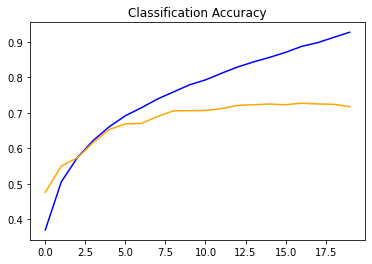

In [ ]:
plt.title("Classification Accuracy")
plt.plot(history.history["accuracy"], color="blue", label="train")
plt.plot(history.history["val_accuracy"], color="orange", label="test")


You can see test Acuracy is 71 but train acuracy is 85 so our model is moving thowrsd overfit

Let's Use Dropout

In [ ]:
from keras.layers import Dropout

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer="he_uniform",input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
model.add(Dense(10, activation="softmax"))

In [ ]:
# example output part of the model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)         

In [ ]:
history=model.fit(train_norm, trainY, epochs=20, batch_size=64, validation_data=(test_norm, testY), verbose=1)

Epoch 1/20
782/782 [==============================] - 7s 9ms/step - loss: 2.3180 - accuracy: 0.1423 - val_loss: 1.8814 - val_accuracy: 0.3391
Epoch 2/20
782/782 [==============================] - 7s 8ms/step - loss: 1.8412 - accuracy: 0.3181 - val_loss: 1.6875 - val_accuracy: 0.3863
Epoch 3/20
782/782 [==============================] - 7s 8ms/step - loss: 1.6713 - accuracy: 0.3741 - val_loss: 1.5306 - val_accuracy: 0.4441
Epoch 4/20
782/782 [==============================] - 7s 8ms/step - loss: 1.5407 - accuracy: 0.4274 - val_loss: 1.4550 - val_accuracy: 0.4743
Epoch 5/20
782/782 [==============================] - 7s 8ms/step - loss: 1.4632 - accuracy: 0.4615 - val_loss: 1.3546 - val_accuracy: 0.5109
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 1.4073 - accuracy: 0.4847 - val_loss: 1.2975 - val_accuracy: 0.5344
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 1.3521 - accuracy: 0.5055 - val_loss: 1.2919 - val_accuracy: 0.5290
Epoch 

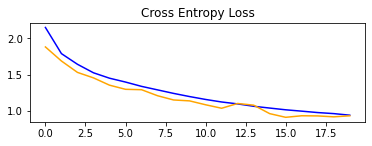

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.title("Cross Entropy Loss")
plt.plot(history.history["loss"], color="blue", label="train")
plt.plot(history.history["val_loss"], color="orange", label="test")

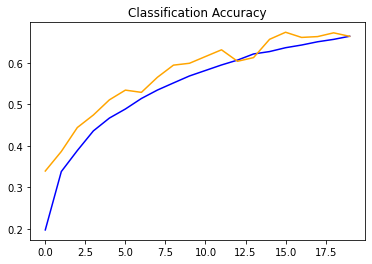

In [ ]:
plt.title("Classification Accuracy")
plt.plot(history.history["accuracy"], color="blue", label="train")
plt.plot(history.history["val_accuracy"], color="orange", label="test")


Our Model is not overfit so we can increase number of epocs

In [ ]:
history=model.fit(train_norm, trainY, epochs=100, batch_size=64, validation_data=(test_norm, testY), verbose=1)

Epoch 1/100
782/782 [==============================] - 7s 8ms/step - loss: 0.9223 - accuracy: 0.6721 - val_loss: 0.8841 - val_accuracy: 0.6846
Epoch 2/100
782/782 [==============================] - 6s 8ms/step - loss: 0.9050 - accuracy: 0.6764 - val_loss: 0.8455 - val_accuracy: 0.6997
Epoch 3/100
782/782 [==============================] - 6s 8ms/step - loss: 0.8983 - accuracy: 0.6801 - val_loss: 0.8286 - val_accuracy: 0.7062
Epoch 4/100
782/782 [==============================] - 6s 8ms/step - loss: 0.8773 - accuracy: 0.6871 - val_loss: 0.8566 - val_accuracy: 0.6983
Epoch 5/100
782/782 [==============================] - 6s 8ms/step - loss: 0.8700 - accuracy: 0.6907 - val_loss: 0.8212 - val_accuracy: 0.7105
Epoch 6/100
782/782 [==============================] - 6s 8ms/step - loss: 0.8484 - accuracy: 0.6958 - val_loss: 0.7823 - val_accuracy: 0.7225
Epoch 7/100
782/782 [==============================] - 6s 8ms/step - loss: 0.8385 - accuracy: 0.7007 - val_loss: 0.7957 - val_accuracy: 0.7180

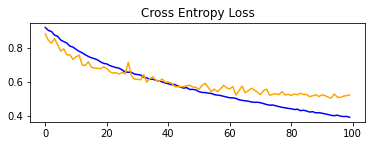

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.title("Cross Entropy Loss")
plt.plot(history.history["loss"], color="blue", label="train")
plt.plot(history.history["val_loss"], color="orange", label="test")

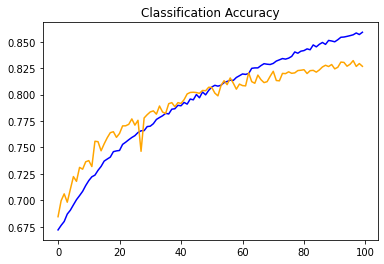

In [ ]:
plt.title("Classification Accuracy")
plt.plot(history.history["accuracy"], color="blue", label="train")
plt.plot(history.history["val_accuracy"], color="orange", label="test")


Now you can see there is no overfitting

Let's Use the Data Augmentation also

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer="he_uniform",input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
model.add(Dense(10, activation="softmax"))

In [ ]:
# example output part of the model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)         

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,
horizontal_flip=True)

In [ ]:
it_train = datagen.flow(train_norm, trainY, batch_size=64)

In [ ]:
steps = int(trainX.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=50,
validation_data=(test_norm, testY), verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
781/781 [==============================] - 26s 33ms/step - loss: 2.3583 - accuracy: 0.1448 - val_loss: 1.9572 - val_accuracy: 0.3091
Epoch 2/50
781/781 [==============================] - 26s 33ms/step - loss: 1.8884 - accuracy: 0.3037 - val_loss: 1.6750 - val_accuracy: 0.4009
Epoch 3/50
781/781 [==============================] - 25s 33ms/step - loss: 1.7188 - accuracy: 0.3635 - val_loss: 1.5564 - val_accuracy: 0.4331
Epoch 4/50
781/781 [==============================] - 25s 33ms/step - loss: 1.5989 - accuracy: 0.4106 - val_loss: 1.5600 - val_accuracy: 0.4362
Epoch 5/50
781/781 [==============================] - 26s 33ms/step - loss: 1.5291 - accuracy: 0.4333 - val_loss: 1.3937 - val_accuracy: 0.4946
Epoch 6/50
781/781 [==============================] - 26s 33ms/step - loss: 1.4835 - accuracy: 0.4570 - val_loss: 1.3726 - val_accuracy: 0.5001
Epoch 7/50
781/781 [==============================] - 26s 33ms/step - loss: 1.4385 - accuracy: 0.4710 - val_loss: 1.3996 - val_accuracy:

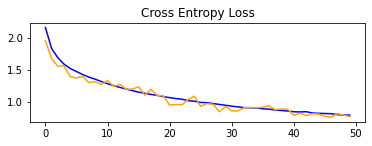

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.title("Cross Entropy Loss")
plt.plot(history.history["loss"], color="blue", label="train")
plt.plot(history.history["val_loss"], color="orange", label="test")

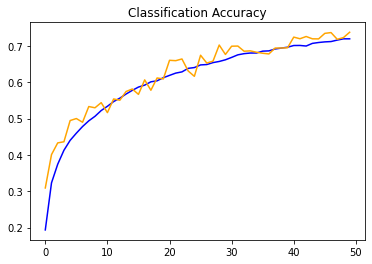

In [ ]:
plt.title("Classification Accuracy")
plt.plot(history.history["accuracy"], color="blue", label="train")
plt.plot(history.history["val_accuracy"], color="orange", label="test")


Let's Use BatchNormalization

In [ ]:
from keras.layers import BatchNormalization

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation="relu",padding="same",kernel_initializer="he_uniform",input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(Conv2D(64, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(Conv2D(128, (3, 3), activation="relu", kernel_initializer="he_uniform",
padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation="relu", kernel_initializer="he_uniform"))
model.add(Dense(10, activation="softmax"))

In [ ]:
# example output part of the model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,
horizontal_flip=True)

In [ ]:
it_train = datagen.flow(train_norm, trainY, batch_size=64)

In [ ]:
steps = int(trainX.shape[0] / 64)
history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=100,
validation_data=(test_norm, testY), verbose=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
781/781 [==============================] - 27s 34ms/step - loss: 2.2585 - accuracy: 0.2299 - val_loss: 1.7157 - val_accuracy: 0.3864
Epoch 2/100
781/781 [==============================] - 26s 33ms/step - loss: 1.6533 - accuracy: 0.3846 - val_loss: 1.6200 - val_accuracy: 0.4231
Epoch 3/100
781/781 [==============================] - 26s 33ms/step - loss: 1.5365 - accuracy: 0.4345 - val_loss: 1.5693 - val_accuracy: 0.4458
Epoch 4/100
781/781 [==============================] - 26s 33ms/step - loss: 1.4613 - accuracy: 0.4667 - val_loss: 1.4599 - val_accuracy: 0.4917
Epoch 5/100
781/781 [==============================] - 26s 33ms/step - loss: 1.4093 - accuracy: 0.4825 - val_loss: 1.4615 - val_accuracy: 0.4851
Epoch 6/100
781/781 [==============================] - 26s 33ms/step - loss: 1.3524 - accuracy: 0.5061 - val_loss: 1.3146 - val_accuracy: 0.5398
Epoch 7/100
781/781 [==============================] - 26s 33ms/step - loss: 1.3064 - accuracy: 0.5268 - val_loss: 1.3077 - val_ac

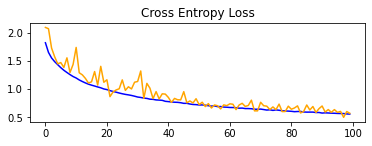

In [ ]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.title("Cross Entropy Loss")
plt.plot(history.history["loss"], color="blue", label="train")
plt.plot(history.history["val_loss"], color="orange", label="test")

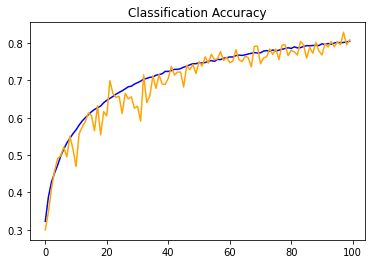

In [ ]:
plt.title("Classification Accuracy")
plt.plot(history.history["accuracy"], color="blue", label="train")
plt.plot(history.history["val_accuracy"], color="orange", label="test")
